In [82]:
import os
import pickle
import imageio
from pathlib import Path

# import the necessary packages
from collections import OrderedDict

import matplotlib.pyplot as plt
%matplotlib inline

from mlxtend.image import extract_face_landmarks

import dlib

import numpy as np

In [83]:
import dlib
import cv2

In [84]:
FACIAL_LANDMARKS_68_IDXS = OrderedDict([
    ("mouth", (48, 68)),
    ("inner_mouth", (60, 68)),
    ("right_eyebrow", (17, 22)),
    ("left_eyebrow", (22, 27)),
    ("right_eye", (36, 42)),
    ("left_eye", (42, 48)),
    ("nose", (27, 36)),
    ("jaw", (0, 17))
])

In [109]:
def rect_to_bb(rect):
    # take a bounding predicted by dlib and convert it
    # to the format (x, y, w, h) as we would normally do
    # with OpenCV
    x = rect.left()
    y = rect.top()
    w = rect.right() - x
    h = rect.bottom() - y
    # return a tuple of (x, y, w, h)
    return (x, y, w, h)

def shape_to_np(shape, dtype="int"):
    # initialize the list of (x, y)-coordinates
    coords = np.zeros((68, 2), dtype=dtype)
    # loop over the 68 facial landmarks and convert them
    # to a 2-tuple of (x, y)-coordinates
    for i in range(0, 68):
        coords[i] = (shape.part(i).x, shape.part(i).y)
    # return the list of (x, y)-coordinates
    return coords

In [110]:
lfw2_crop = os.path.join('..', 'Data', 'lfw2_cropped')
putin_01 = Path(lfw2_crop, 'Vladimir_Putin', 'Vladimir_Putin_0001.jpg')

In [111]:
# img = plt.imread(putin_01)
# predictor = dlib.shape_predictor(args["shape_predictor"])
# shape = predictor(img)
# print(shape.shape)
# print('\n\nFirst 10 landmarks:\n', shape[:10])

In [112]:
img = plt.imread(putin_01)
landmarks = extract_face_landmarks(img)
print(landmarks.shape)
print('\n\nFirst 10 landmarks:\n', landmarks[:10])

(68, 2)


First 10 landmarks:
 [[ 12  30]
 [ 13  43]
 [ 15  55]
 [ 18  66]
 [ 21  77]
 [ 26  86]
 [ 33  95]
 [ 41 101]
 [ 53 102]
 [ 66 102]]


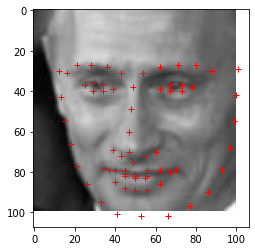

In [119]:
fig, ax = plt.subplots(1)
ax.imshow(img, cmap='gray')
for i, (x,y) in enumerate(landmarks):
    ax.plot(x, y, 'r+')
#     ax.annotate(text=str(i), xy=(x,y))

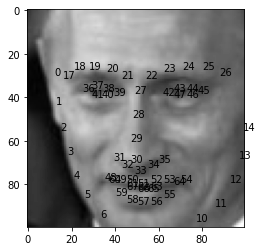

In [120]:
fig, ax = plt.subplots(1)
ax.imshow(img, cmap='gray')
for i, (x,y) in enumerate(landmarks):
#     ax.plot(x, y, 'r+')
    ax.annotate(text=str(i), xy=(x,y))

In [117]:
# extract the left and right eye (x, y)-coordinates
(lStart, lEnd) = FACIAL_LANDMARKS_68_IDXS["left_eye"]
print((lStart, lEnd))
(rStart, rEnd) = FACIAL_LANDMARKS_68_IDXS["right_eye"]
print((rStart, rEnd))


(42, 48)
(36, 42)


In [121]:
leftEyePts = landmarks[lStart:lEnd]
rightEyePts = landmarks[rStart:rEnd]

In [122]:
# compute the center of mass for each eye
leftEyeCenter = leftEyePts.mean(axis=0).astype("int")
rightEyeCenter = rightEyePts.mean(axis=0).astype("int")

In [123]:
# compute the angle between the eye centroids
dY = rightEyeCenter[1] - leftEyeCenter[1]
dX = rightEyeCenter[0] - leftEyeCenter[0]
angle = np.degrees(np.arctan2(dY, dX)) - 180

In [144]:
desiredLeftEye=(0.35, 0.35)
desiredFaceWidth=100
desiredFaceHeight=100

In [127]:
# compute the desired right eye x-coordinate based on the
# desired x-coordinate of the left eye
desiredRightEyeX = 1.0 - desiredLeftEye[0]

In [128]:
# determine the scale of the new resulting image by taking
# the ratio of the distance between eyes in the *current*
# image to the ratio of distance between eyes in the
# *desired* image
dist = np.sqrt((dX ** 2) + (dY ** 2))
desiredDist = (desiredRightEyeX - desiredLeftEye[0])
desiredDist *= desiredFaceWidth
scale = desiredDist / dist

In [129]:
# compute center (x, y)-coordinates (i.e., the median point)
# between the two eyes in the input image
eyesCenter = ((leftEyeCenter[0] + rightEyeCenter[0]) // 2,
(leftEyeCenter[1] + rightEyeCenter[1]) // 2)

In [134]:
# update the translation component of the matrix
tX = desiredFaceWidth * 0.5
tY = desiredFaceHeight * desiredLeftEye[1]
M[0, 2] += (tX - eyesCenter[0])
M[1, 2] += (tY - eyesCenter[1])

In [135]:
# grab the rotation matrix for rotating and scaling the face
M = cv2.getRotationMatrix2D(eyesCenter, angle, scale)

In [136]:
# update the translation component of the matrix
tX = desiredFaceWidth * 0.5
tY = desiredFaceHeight * desiredLeftEye[1]
M[0, 2] += (tX - eyesCenter[0])
M[1, 2] += (tY - eyesCenter[1])

In [145]:
# apply the affine transformation
(w, h) = (desiredFaceWidth, desiredFaceHeight)
output = cv2.warpAffine(img, M, (w, h),
                            flags=cv2.INTER_CUBIC)

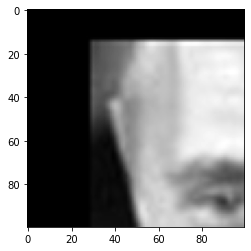

In [146]:
fig, ax = plt.subplots(1)
ax.imshow(output, cmap='gray')

In [143]:
np.shape(img)

(100, 100)

In [104]:
detector = dlib.get_frontal_face_detector()
detections = detector(img, 1)

In [55]:
len(detections)

1

In [56]:
a = detections.pop()

In [59]:
a

rectangle(6,17,96,106)

In [67]:
a.width()

91

In [ ]:
# At this point, we create landmark detectors and test them:
print("testing LBF")
facemark = cv2.face.createFacemarkLBF()
facemark .loadModel("lbfmodel.yaml")
ok, landmarks = facemark.fit(image , faces)
print ("landmarks LBF", ok, landmarks)